In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
import pandas as pd
df = pd.read_csv("/content/maths correlation - Sheet1.csv")
df.head(20)

,class_score,sat_score
0,80,680
1,77,650
2,76,690
3,65,590
4,77,630
5,98,780
6,93,790
7,96,800
8,66,690
9,77,580


In [3]:
# df.columns['class_score', 'sat_score']

In [4]:
X = df.drop("sat_score", axis = 1)
Y = df["sat_score"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(20, 1)
(16, 1)
(4, 1)


In [6]:
X_train_simple = X_train['class_score'].values.reshape(-1, 1)
X_test_simple = X_test['class_score'].values.reshape(-1, 1)

X_train_simple.shape, X_test_simple.shape

((16, 1), (4, 1))

In [7]:
simple_lm = LinearRegression()
simple_lm.fit(X_train_simple, y_train)

LinearRegression()

In [8]:
y_hat_simple = simple_lm.predict(X_test_simple)
y_hat_simple[:5]

array([607.77036419, 602.47104068, 756.15142248, 708.45751089])

In [9]:
simple_lm.intercept_

263.3143360207581

In [10]:
simple_lm.coef_.item()

5.299323510332684

In [11]:
# sat_score = 5.299323510332684 * class_score + 263.3143360207581

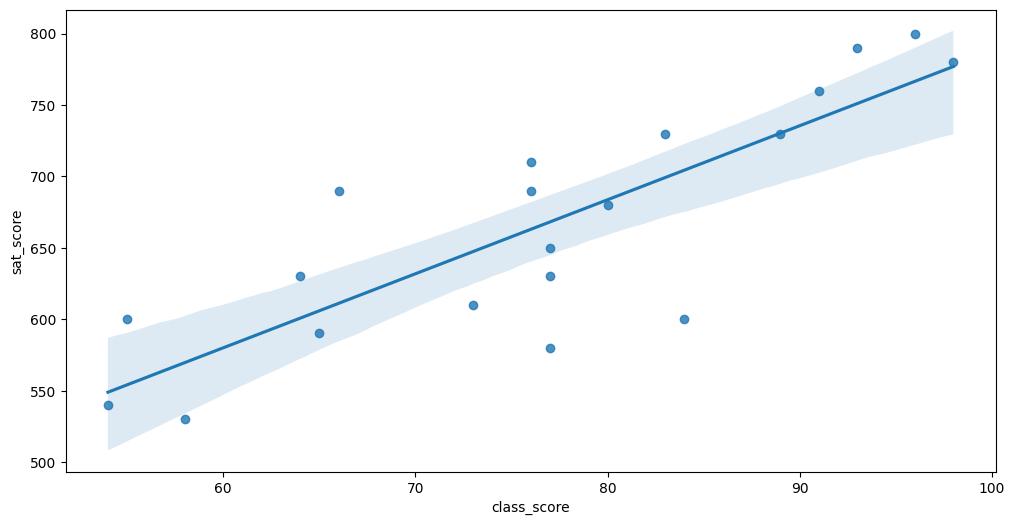

In [12]:
plt.figure(figsize=(12, 6))
sns.regplot(x= 'class_score', y ='sat_score', data=df)
plt.show()

In [14]:
import pickle

In [15]:
# Save the model
with open("linear_regression_model.pickle", 'wb') as file:
    pickle.dump(simple_lm, file)